In [94]:
#!pip install torch==1.0.0 torchvision==0.2.2 -f https://download.pytorch.org/whl/cu90/torch_stable.html
%load_ext autoreload
%autoreload 2

import argparse
import os
import torch
import capsulenet

# setting the hyper parameters
parser = argparse.ArgumentParser(description="Capsule Network.")

parser.add_argument('--epochs', default=50, type=int)
parser.add_argument('--batch_size', default=200, type=int)
parser.add_argument('--lr', default=0.001, type=float,help="Initial learning rate")
parser.add_argument('--lr_decay', default=0.9, type=float,help="The value multiplied by lr at each epoch. Set a larger value for larger epochs")
parser.add_argument('--lam_recon', default=0.0005 * 784, type=float,help="The coefficient for the loss of decoder")
parser.add_argument('-r', '--routings', default=3, type=int,help="Number of iterations used in routing algorithm. should > 0")  # num_routing should > 0
parser.add_argument('--shift_pixels', default=2, type=int,help="Number of pixels to shift at most in each direction.")
parser.add_argument('--data_dir', default='../wind_data/',help="Directory of data. If no data, use \'--download\' flag to download it")
parser.add_argument('--download', action='store_true',help="Download the required data.")
parser.add_argument('--save_dir', default='./result')
parser.add_argument('-t', '--testing', action='store_true',help="Test the trained model on testing dataset")
parser.add_argument('-w', '--weights', default=None,help="The path of the saved weights. Should be specified when testing")
args = parser.parse_args(args=[])
print(args)

if not os.path.exists(args.save_dir):
    os.makedirs(args.save_dir)

# load direction data
input_size=[3, 6, 9]
train_loader, test_loader = capsulenet.load('direction',input_size ,'../wind_data/',200)

# define model
model = capsulenet.CapsuleNet(input_size, classes=8, routings=5)
if torch.cuda.is_available():
  model.cuda()

capsulenet.train(model, train_loader, test_loader, args)
test_loss, test_acc = capsulenet.test(model=model, test_loader=test_loader, args=args)
print('test acc = %.4f, test loss = %.5f' % (test_acc, test_loss))


# load magnitude data
input_size=[3, 6, 9]
train_loader, test_loader = capsulenet.load('magnitude',input_size ,'../wind_data/',200)

# define model
model = capsulenet.CapsuleNet(input_size, classes=8, routings=5)
if torch.cuda.is_available():
  model.cuda()

capsulenet.train(model, train_loader, test_loader, args)
test_loss, test_acc = capsulenet.test(model=model, test_loader=test_loader, args=args)
print('test acc = %.4f, test loss = %.5f' % (test_acc, test_loss))
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Namespace(batch_size=200, data_dir='../wind_data/', download=False, epochs=5, lam_recon=0.392, lr=0.001, lr_decay=0.9, routings=3, save_dir='./result', shift_pixels=2, testing=False, weights=None)
[3, 6, 9]
Begin Training----------------------------------------------------------------------
0


C:\Users\radmon\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


==> Epoch 00: loss=0.83964, val_loss=0.74762, val_acc=0.4550, time=40s
best val_acc increased to 0.4550
1
==> Epoch 01: loss=0.72174, val_loss=0.70713, val_acc=0.4850, time=39s
best val_acc increased to 0.4850
2
==> Epoch 02: loss=0.68370, val_loss=0.67393, val_acc=0.5105, time=39s
best val_acc increased to 0.5105
3
==> Epoch 03: loss=0.65481, val_loss=0.65630, val_acc=0.5210, time=40s
best val_acc increased to 0.5210
4
==> Epoch 04: loss=0.63655, val_loss=0.63878, val_acc=0.5236, time=40s
best val_acc increased to 0.5236
Trained model saved to './result/trained_model.h5'
Total time = 200s
End Training----------------------------------------------------------------------
test acc = 0.5236, test loss = 0.63878
[3, 6, 9]
Begin Training----------------------------------------------------------------------
0
==> Epoch 00: loss=0.77288, val_loss=0.66002, val_acc=0.5666, time=41s
best val_acc increased to 0.5666
1
==> Epoch 01: loss=0.65399, val_loss=0.62680, val_acc=0.5848, time=39s
best va

test acc = 0.5235, test loss = 0.64259


C:\Users\radmon\Documents\roni\weizmann\ML\finalProject\CapsNet-Pytorch-master\capsulenet.py:112: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  x = Variable(x[:min(n_images, x.size(0))], volatile=True) #.cuda(), volatile=True)



Reconstructed images are saved to ./result/real_and_recon.png
----------------------------------------------------------------------


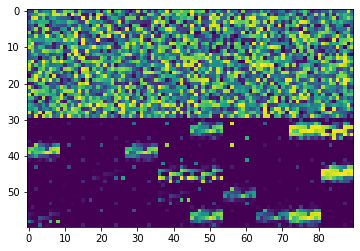

In [93]:
test_loss, test_acc = capsulenet.test(model=model, test_loader=test_loader, args=args)
print('test acc = %.4f, test loss = %.5f' % (test_acc, test_loss))

In [64]:
path='../wind_data/'
fieldname = '_6hourly_20090101-20191231.npy'
y_arr = np.load(path+'stationwind'+fieldname)
print(y_arr)

[[-0.89930272  1.47081391]
 [-0.84853525  1.64446209]
 [ 2.0970351  -0.71706022]
 ...
 [-3.11444136  0.13540948]
 [-1.52215277 -1.49412678]
 [-1.6356719   1.96846817]]


In [59]:
import math
print(y_arr[10])
y1=y_arr[10][0]
x1=y_arr[10][0]
print(math.atan(y1/x1))
print(math.pow(math.pow(y1,2)+math.pow(x1,2),0.5))

[ 0.57453333 -1.48209071]
-0.7853981633974483
0.8125128306295517


In [23]:

# train or test
if args.weights is not None:  # init the model weights with provided one
    model.load_state_dict(torch.load(args.weights))
if not args.testing:
    capsulenet.train(model, train_loader, test_loader, args)
else:  # testing
    if args.weights is None:
        print('No weights are provided. Will test using random initialized weights.')
    test_loss, test_acc = test(model=model, test_loader=test_loader, args=args)
    print('test acc = %.4f, test loss = %.5f' % (test_acc, test_loss))
    #show_reconstruction(model, test_loader, 50, args)

Begin Training----------------------------------------------------------------------
0


KeyboardInterrupt: 

In [85]:
def caps_loss(y_true, y_pred, x, x_recon, lam_recon):
    L = y_true * torch.clamp(0.9 - y_pred, min=0.) ** 2 + \
        0.5 * (1 - y_true) * torch.clamp(y_pred - 0.1, min=0.) ** 2
    L_margin = L.sum(dim=1).mean()

    L_recon = nn.MSELoss()(x_recon, x)

    return L_margin + lam_recon * L_recon


NameError: ignored

In [17]:
import torch
from torch.utils.data import TensorDataset,DataLoader
import numpy as np
import os
from scipy import stats

os.chdir(os.getcwd())
path = 'data/'
fieldname = '_19790101-20190228.npy'
x1_arr = np.load(path+'z1000'+fieldname) # geopotential height data (9*9 resolution)
x2_arr = np.load(path+'pv300'+fieldname) # potential vorticity data (9*9 resolution)
x3_arr = np.load(path+'z1000'+fieldname) # geopotential height data (9*9 resolution)

x1_arr_flat = stats.zscore(x1_arr.reshape([x1_arr.shape[0],x1_arr.shape[1]*x1_arr.shape[2]])) # normalize and flatten
x2_arr_flat = stats.zscore(x2_arr.reshape([x2_arr.shape[0],x2_arr.shape[1]*x2_arr.shape[2]]))
x3_arr_flat = stats.zscore(x3_arr.reshape([x3_arr.shape[0],x3_arr.shape[1]*x3_arr.shape[2]]))
y_arr = np.load(path+'rain_basin_19790101-20190228.npy') # rain data

tensor_x = torch.Tensor(np.concatenate([x1_arr_flat,x2_arr_flat,x3_arr_flat],axis=1)) # join z and pv data
tensor_y = torch.Tensor(y_arr)

forecast_dataset = TensorDataset(tensor_x,tensor_y) # creates a dataset based on tensors
forecast_dataset2 = []


for j in forecast_dataset:
  forecast_dataset2.append( ( j[0].reshape((3, 9, 9)) , j[1] ) ) # Rotem: ask about order of 162
training_ds, validation_ds = torch.utils.data.random_split(forecast_dataset2, [2195,1464])
training_dataloader = DataLoader(training_ds,batch_size=200,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=200)

for batch_x,batch_y in training_dataloader:
  print(batch_x.shape, batch_y.shape)

torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([200, 3, 9, 9]) torch.Size([200, 4])
torch.Size([195, 3, 9, 9]) torch.Size([195, 4])


In [21]:
  loss = caps_loss(batch_y, batch_y, batch_x,batch_x, args.lam_recon)

  loss

tensor(-7271.9624)